In [1]:
### Download YOLO Algrithm Files.¶

In [1]:
!git clone https://github.com/ultralytics/yolov5
!pip install -qr yolov5/requirements.txt

In [3]:
### Imports

In [2]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
### Path to Annotations

In [3]:
path_an = "../Dataset/Images"

In [7]:
### Creating a dataframe of labels/annotations

In [4]:
def labels2df(path):
    dataset = {
            "file":[],
            "name":[],    
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],   
            "xmax":[],
            "ymax":[],
           }

    for anno in glob.glob(path+"/*.xml"):
        tree = ET.parse(anno)

        for elem in tree.iter():
            if 'size' in elem.tag:
                for attr in list(elem):
                    if 'width' in attr.tag: 
                        width = int(round(float(attr.text)))
                    if 'height' in attr.tag:
                        height = int(round(float(attr.text)))    

            if 'object' in elem.tag:
                for attr in list(elem):

                    if 'name' in attr.tag:
                        name = attr.text                 
                        dataset['name']+=[name]
                        dataset['width']+=[width]
                        dataset['height']+=[height] 
                        dataset['file']+=[anno.split('/')[-1][0:-4]] 

                    if 'bndbox' in attr.tag:
                        for dim in list(attr):
                            if 'xmin' in dim.tag:
                                xmin = int(round(float(dim.text)))
                                dataset['xmin']+=[xmin]
                            if 'ymin' in dim.tag:
                                ymin = int(round(float(dim.text)))
                                dataset['ymin']+=[ymin]                                
                            if 'xmax' in dim.tag:
                                xmax = int(round(float(dim.text)))
                                dataset['xmax']+=[xmax]                                
                            if 'ymax' in dim.tag:
                                ymax = int(round(float(dim.text)))
                                dataset['ymax']+=[ymax]
    return dataset

In [5]:
dataset_label = labels2df(path_an)
df=pd.DataFrame(dataset_label)
df.head()

file         name  width  height  xmin  ymin  xmax  ymax
0   88   class_name   1080    1920   316   563   792   726
1   88  class_total   1080    1920   258  1058   912  1234
2   63  class_total   1080    1920   190  1000   903  1334
3   77   class_name   1080    1920   110   526  1012   671
4   77  class_total   1080    1920   345   902  1036  1330

In [6]:
df.tail()

file         name  width  height  xmin  ymin  xmax  ymax
234   46  class_total   1080    1920   245  1454   829  1654
235   91   class_name   1080    1920   264   569   775   789
236   91  class_total   1080    1920   221   902   808  1139
237   85   class_name   1080    1920   205   730   695   893
238   85  class_total   1080    1920    88  1160   799  1445

In [11]:
### Encoding class name

In [7]:
def encode_class(data):
    name_dict = {
        'class_name': 0,
        'class_total': 1 
    }

    data['class'] = data['name'].map(name_dict)
    return data
    
df_encoded = encode_class(df)
df_encoded.head()

file         name  width  height  xmin  ymin  xmax  ymax  class
0   88   class_name   1080    1920   316   563   792   726      0
1   88  class_total   1080    1920   258  1058   912  1234      1
2   63  class_total   1080    1920   190  1000   903  1334      1
3   77   class_name   1080    1920   110   526  1012   671      0
4   77  class_total   1080    1920   345   902  1036  1330      1

In [13]:
### ensuring label dataframe

In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    239 non-null    object
 1   name    239 non-null    object
 2   width   239 non-null    int64 
 3   height  239 non-null    int64 
 4   xmin    239 non-null    int64 
 5   ymin    239 non-null    int64 
 6   xmax    239 non-null    int64 
 7   ymax    239 non-null    int64 
 8   class   239 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 16.9+ KB


In [9]:
np.sort(df_encoded.name.unique())

array(['class_name', 'class_total'], dtype=object)

In [16]:
### Split Data to Train, Validation, and Test.

In [10]:
filenames = []

for img in glob.glob(path_an+"/*.jpg"):
    filenames.append(img)
    
print(len(filenames))

118


In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(filenames, test_size=0.2, random_state=13)
test, val = train_test_split(test, test_size=0.7, random_state=13)

print("Length of Train =",len(train))
print("="*30)
print("Length of Valid =",len(val))
print("="*30)
print("Length of test =", len(test))

Length of Train = 94
Length of Valid = 17
Length of test = 7


In [19]:
### making directory in YOLOv5/data

In [20]:
# os.mkdir('./yolov5/data/train')
# os.mkdir('./yolov5/data/val')
# os.mkdir('./yolov5/data/test')
# os.mkdir('./yolov5/data/train/images')
# os.mkdir('./yolov5/data/train/labels')
# os.mkdir('./yolov5/data/test/images')
# os.mkdir('./yolov5/data/test/labels')
# os.mkdir('./yolov5/data/val/images')
# os.mkdir('./yolov5/data/val/labels')

In [21]:
### copying image to Yolov5 directory and resizing

In [12]:
from PIL import Image, ImageOps

def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open(image)
        img = ImageOps.exif_transpose(img)
        img1 = img.resize((640, 480))
        _ = img1.save("datasets/receipts/"+folder_Name+"/images/"+image[18:])
        
copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

In [13]:
df_encoded_copy = df_encoded.copy()

In [14]:
df_encoded['xmax'] = (640/df_encoded['width'])*df_encoded['xmax']
df_encoded['ymax'] = (480/df_encoded['height'])*df_encoded['ymax']
df_encoded['xmin'] = (640/df_encoded['width'])*df_encoded['xmin']
df_encoded['ymin'] = (480/df_encoded['height'])*df_encoded['ymin']

df_encoded[['xmax', 'ymax', 'xmin', 'ymin']] = df_encoded[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

df_encoded['x_center'] = (df_encoded['xmax']+df_encoded['xmin'])/(2*640)
df_encoded['y_center'] = (df_encoded['ymax']+df_encoded['ymin'])/(2*480)
df_encoded['box_height'] = (df_encoded['xmax']-df_encoded['xmin'])/(640)
df_encoded['box_width'] = (df_encoded['ymax']-df_encoded['ymin'])/(480)

display(df_encoded.head())
display(df_encoded_copy.head())

file         name  width  height  xmin  ymin  xmax  ymax  class  x_center  \
0   88   class_name   1080    1920   187   140   469   181      0  0.512500   
1   88  class_total   1080    1920   152   264   540   308      1  0.540625   
2   63  class_total   1080    1920   112   250   535   333      1  0.505469   
3   77   class_name   1080    1920    65   131   599   167      0  0.518750   
4   77  class_total   1080    1920   204   225   613   332      1  0.638281   

   y_center  box_height  box_width  
0  0.334375    0.440625   0.085417  
1  0.595833    0.606250   0.091667  
2  0.607292    0.660937   0.172917  
3  0.310417    0.834375   0.075000  
4  0.580208    0.639062   0.222917

file         name  width  height  xmin  ymin  xmax  ymax  class
0   88   class_name   1080    1920   316   563   792   726      0
1   88  class_total   1080    1920   258  1058   912  1234      1
2   63  class_total   1080    1920   190  1000   903  1334      1
3   77   class_name   1080    1920   110   526  1012   671      0
4   77  class_total   1080    1920   345   902  1036  1330      1

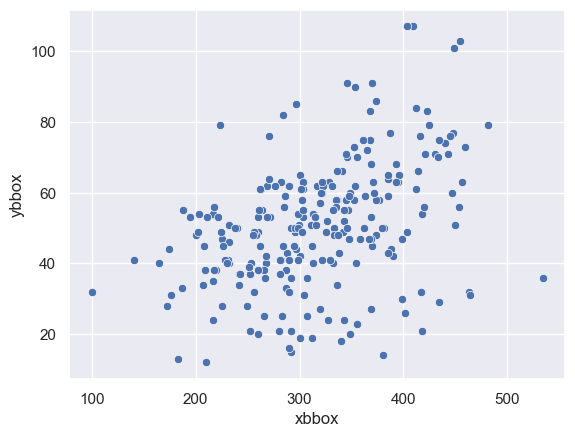

In [15]:
df_encoded['xbbox'] = df_encoded['xmax']-df_encoded['xmin']
df_encoded['ybbox'] = df_encoded['ymax']-df_encoded['ymin']

sns.set()
sns.scatterplot(x='xbbox',  y='ybbox', data=df_encoded)
plt.show()

In [26]:
### encoding all datatype to string

In [16]:
df_encoded = df_encoded.astype('string')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file        239 non-null    string
 1   name        239 non-null    string
 2   width       239 non-null    string
 3   height      239 non-null    string
 4   xmin        239 non-null    string
 5   ymin        239 non-null    string
 6   xmax        239 non-null    string
 7   ymax        239 non-null    string
 8   class       239 non-null    string
 9   x_center    239 non-null    string
 10  y_center    239 non-null    string
 11  box_height  239 non-null    string
 12  box_width   239 non-null    string
 13  xbbox       239 non-null    string
 14  ybbox       239 non-null    string
dtypes: string(15)
memory usage: 28.1 KB


In [28]:
### Saving labels in Yolov5

In [17]:
def create_labels(image_list, data_name, encoded_dataset):
    fileNames = [image[18:].split(".")[0] for image in image_list]

    for name in fileNames:
        data = encoded_dataset[encoded_dataset.file==name]
        box_list = []
        
        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])
            
        text = "\n".join(box_list)
        with open("datasets/receipts/"+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)   
            

create_labels(train, "train", df_encoded)
create_labels(val, "val", df_encoded)
create_labels(test, "test", df_encoded)

In [18]:
%cd yolov5

/Users/pritiranjansahoo/Workstation/python_code/self_learn_implementation/Reciepts_Detect/Research/Code /yolov5


In [31]:
### Configuration of YoloV5

In [26]:
from IPython.display import Image, Video, clear_output  # to display images
import torch
from yolov5 import utils
print(torch.backends.mps.is_available())
display = utils.notebook_init()

YOLOv5 🚀 2022-12-26 Python-3.10.8 torch-1.13.1 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 223.6/460.4 GB disk)


In [27]:
yaml_text = """
path: ../datasets/receipts
train: train/images
val: val/images

nc: 2
names: ['class_name','class_total']"""

with open("data/data_reciepts.yaml", 'w') as file:
    file.write(yaml_text)
    
"""The cat command is a Unix utility that concatenates and displays the contents
of one or more text files. It is commonly used to quickly view the contents of a
file, or to combine multiple files into a single output."""
%cat data/data_reciepts.yaml


path: ../datasets/receipts
train: train/images
val: val/images

nc: 2
names: ['class_name','class_total']

In [34]:
#customize iPython writefile so we can write variables
"""The @register_line_cell_magic decorator is used in the Jupyter Notebook
to define a custom line or cell magic. A magic is a special command that
starts with a % character and is followed by the name of the magic.
Magics are used to perform various tasks in the Jupyter Notebook,
such as running code in a different language or executing system commands.

The @register_line_cell_magic decorator allows you to define your own custom magic.
To use it, you need to define a function that takes two arguments: line and cell.
The line argument is used for line magics and contains the rest of the line after
the magic. The cell argument is used for cell magics and contains the contents of
the cell as a string."""

'The @register_line_cell_magic decorator is used in the Jupyter Notebook\nto define a custom line or cell magic. A magic is a special command that\nstarts with a % character and is followed by the name of the magic.\nMagics are used to perform various tasks in the Jupyter Notebook,\nsuch as running code in a different language or executing system commands.\n\nThe @register_line_cell_magic decorator allows you to define your own custom magic.\nTo use it, you need to define a function that takes two arguments: line and cell.\nThe line argument is used for line magics and contains the rest of the line after\nthe magic. The cell argument is used for cell magics and contains the contents of\nthe cell as a string.'

In [28]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [29]:
%%writetemplate models/custom_yolov5x.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 2  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [37]:
# train yolov5s on custom data for 100 epochs
# time its performance

In [30]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=6ZQVVR6GL1ATC2PZDW4Z
%env CLEARML_API_SECRET_KEY=n1UrJAydAaTLB7ojhB5gvsZDCma1Qo8TNGjIQH6n88iQVq9pek

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=6ZQVVR6GL1ATC2PZDW4Z
env: CLEARML_API_SECRET_KEY=n1UrJAydAaTLB7ojhB5gvsZDCma1Qo8TNGjIQH6n88iQVq9pek


In [39]:
### testing model

In [40]:
#!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

In [41]:
#display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [31]:
start = datetime.now()
!python train.py --img 640 --batch 4 --epochs 100 --data data_reciepts.yaml --cfg models/custom_yolov5x.yaml --weights '' --name yolov5s_results  --cache
end = datetime.now()

train: weights=, cfg=models/custom_yolov5x.yaml, data=data_reciepts.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=mps, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 29 (delta 14), reused 14 (delta 14), pack-reused 10
Unpacking objects: 100% (29/29), 8.13 KiB | 320.00 KiB/s, done.
From https://github.com/ultralytics/yolov5
   96a71b1..3c1afd9  master     -> origin/master
 * [new branch]      d

COMET INFO: Still saving offline stats to messages file before program termination (may take up to 120 seconds)
COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /Users/pritiranjansahoo/Workstation/python_code/self_learn_implementation/Reciepts_Detect/Research/Code /yolov5/.cometml-runs/80fea86463f54aa38ed03cef2a0c0868.zip


In [43]:
print("Runtime =",end-start)

Runtime = 12:07:27.117121


In [44]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'TensorBoard' #@param ['TensorBoard', 'Comet', 'ClearML']

if logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()

In [45]:
### Validation check

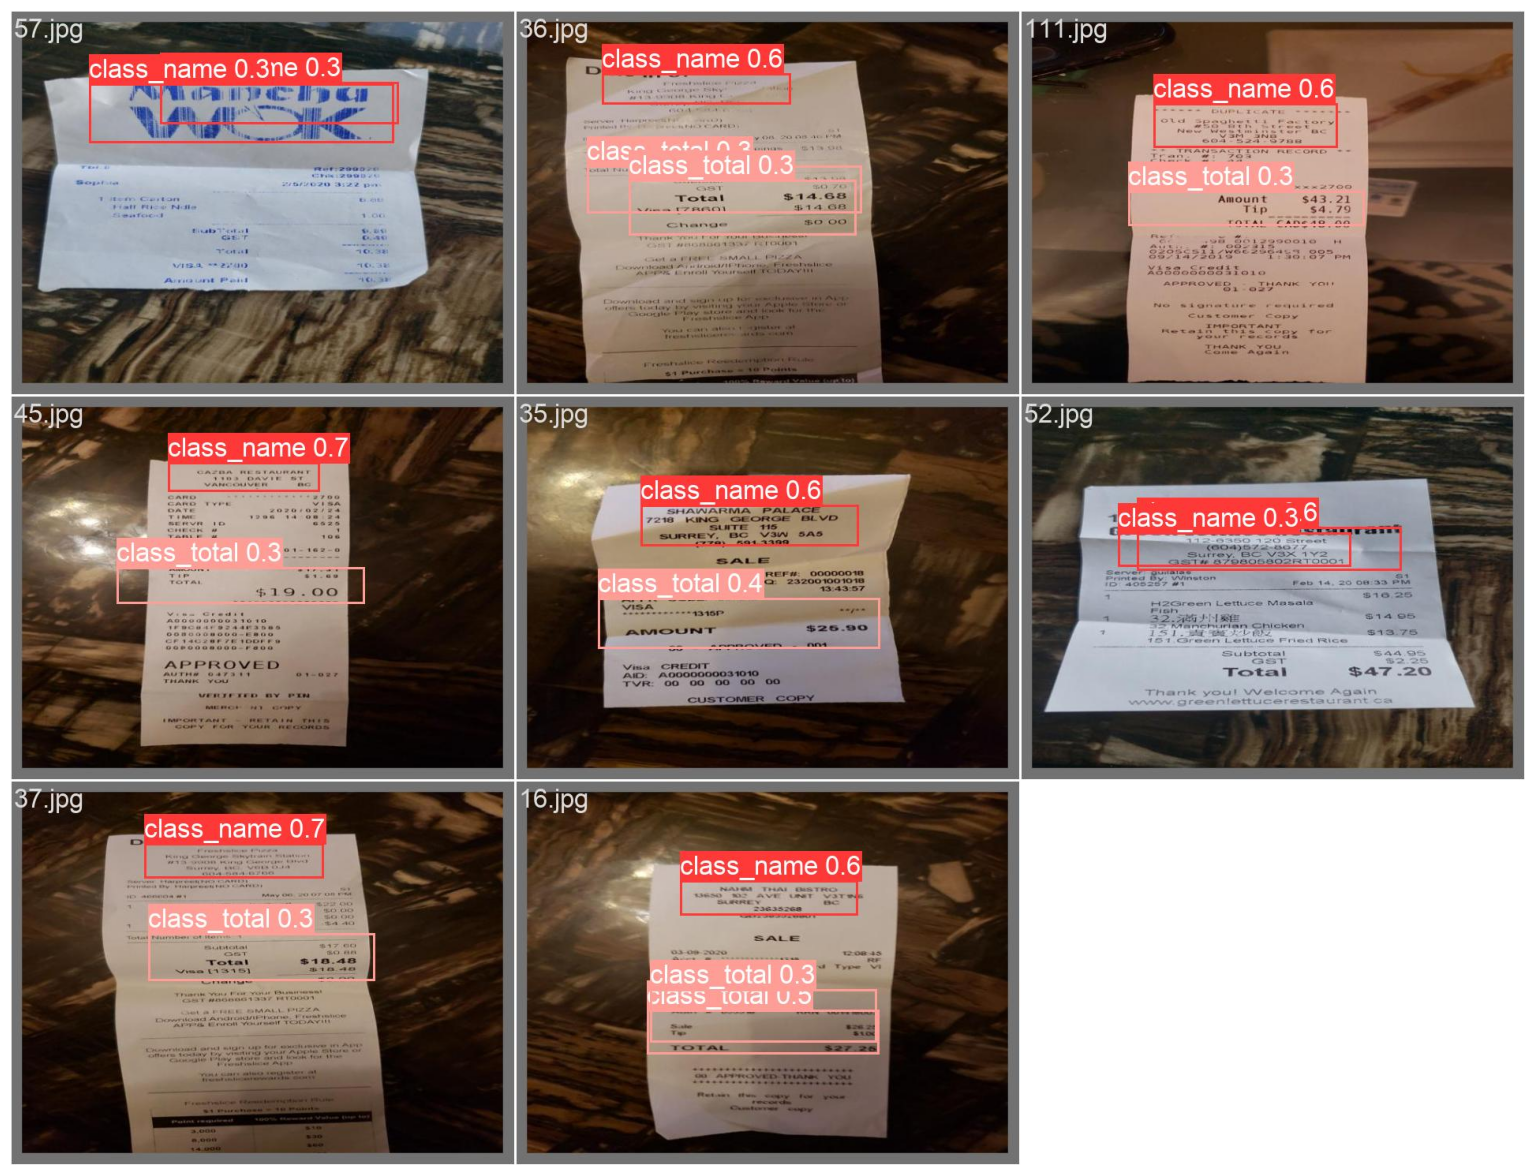

In [46]:
img = plt.imread('runs/train/yolov5s_results4/val_batch1_pred.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [52]:
!python detect.py --source ../datasets/receipts/test/images/ --weight runs/train/yolov5s_results4/weights/best1.pt --name expTestImage --conf 0.1 --device mps

detect: weights=['runs/train/yolov5s_results4/weights/best.pt'], source=../datasets/receipts/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=expTestImage, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/Users/pritiranjansahoo/Workstation/python_code/self_learn_implementation/Reciepts_Detect/Research/Code': No such file or directory
YOLOv5 🚀 2022-12-20 Python-3.10.8 torch-1.13.1 CPU

Fusing layers... 
custom_YOLOv5x summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
image 1/7 /Users/pritiranjansahoo/Workstation/python_code/self_learn_implementation/Reciepts_Detect/Research/Code /datasets/receipts/test/images/100.jpg: 480x640 1 class_name, 1 cl

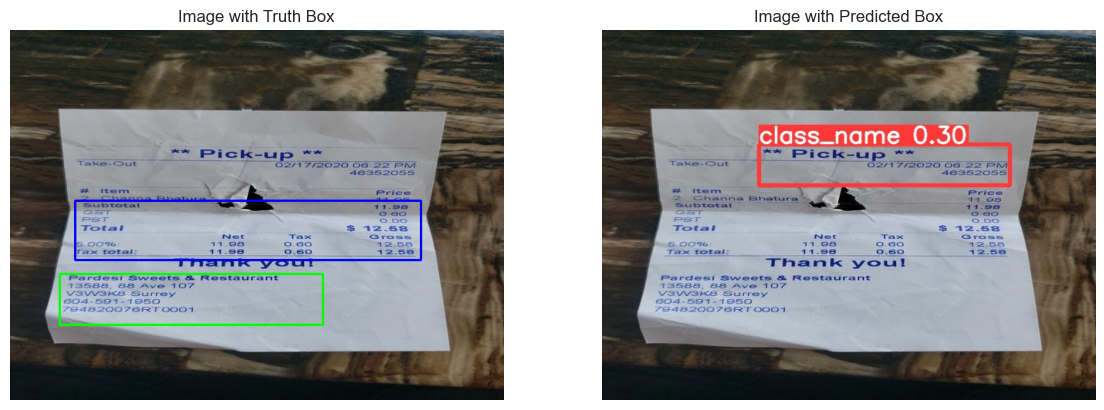

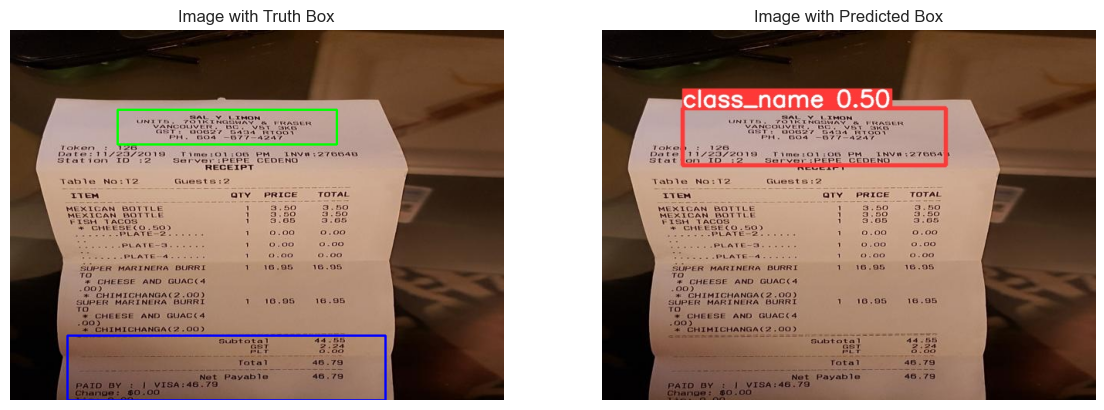

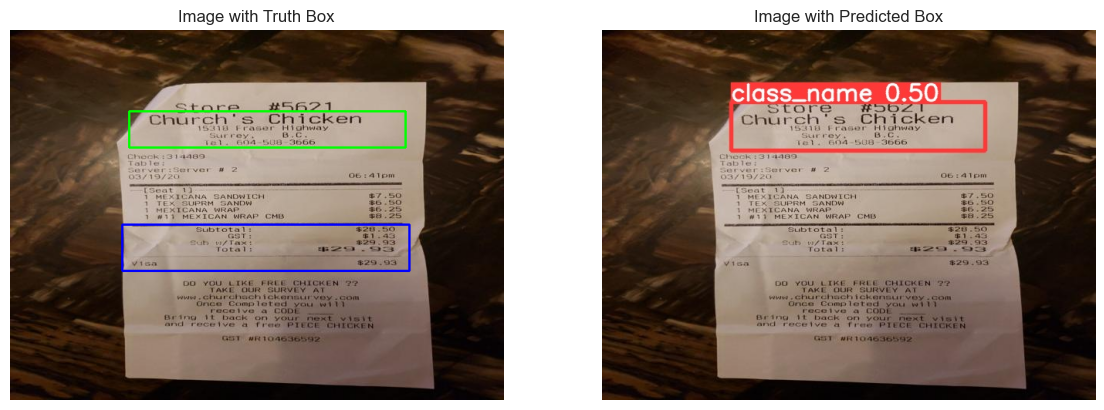

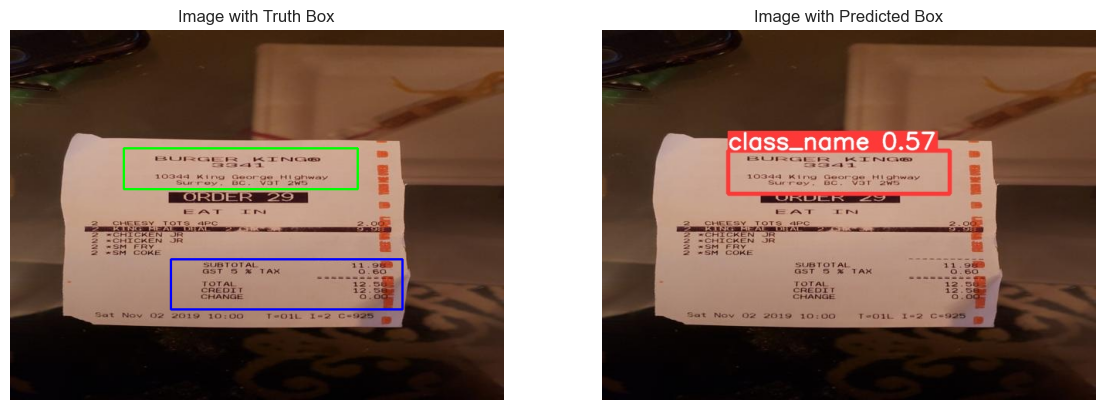

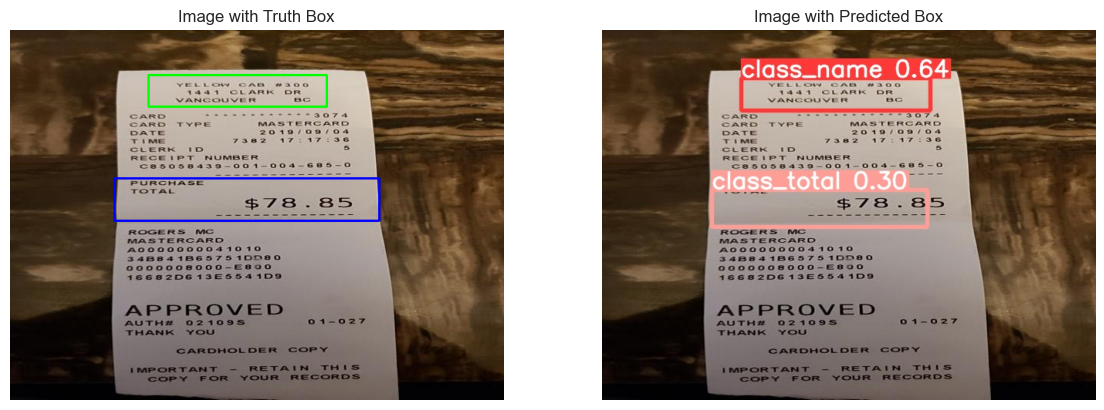

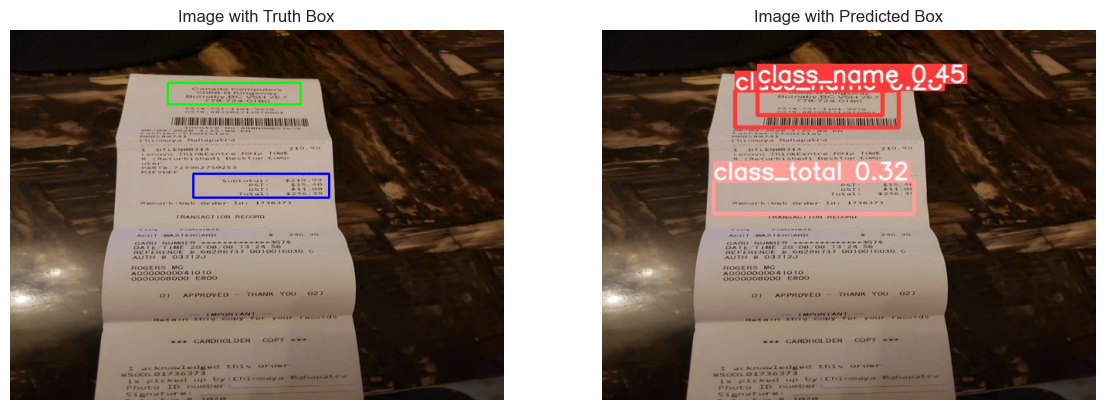

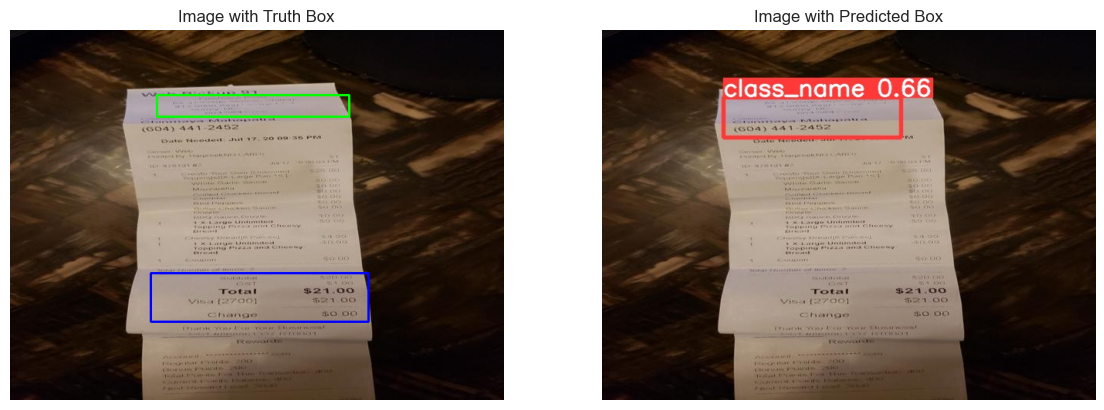

In [53]:
color_dict = {
    'class_name': (0, 255, 0),
    'class_total':  (0, 0, 255)
}

def show_image(img_id):
    df_image = df_encoded[df_encoded.file==img_id]
    df_image[['xmin', 'ymin', 'xmax', 'ymax']] = df_image[['xmin', 'ymin', 'xmax', 'ymax']].astype('int64')
    path = '../datasets/receipts/test/images/'+img_id+'.jpg'
    img = plt.imread(path)

    imge = img.copy()

    for index in range(len(df_image)):
        row = df_image.iloc[index]
        cv2.rectangle(imge, 
                      (row['xmin'], row['ymin']),
                      (row['xmax'], row['ymax']),
                      color=color_dict[row['name']],
                      thickness=2)

    img_pred = plt.imread('runs/detect/expTestImage/'+img_id+".jpg")
    # ===================================
    plt.figure(figsize=(14,17))

    plt.subplot(1,2,1)
    plt.imshow(imge)
    plt.axis('off')
    plt.title('Image with Truth Box')

    plt.subplot(1,2,2)
    plt.imshow(img_pred)
    plt.axis('off')
    plt.title('Image with Predicted Box')
    
show_image("49")  
show_image("90") 
show_image("43") 
show_image("100") 
show_image("112") 
show_image("20") 
show_image("24") 
plt.show()

In [34]:
import subprocess

# Execute the CLI command and store the output
cli_detect = "python detect.py --source ../datasets/receipts/test/images/ \
--weight runs/train/yolov5s_results4/weights/best.pt --conf 0.1 --save-crop" 

# Split the string into tokens using a space as the delimiter
tokens = cli_detect.split(' ')
#print(tokens)

# Execute the CLI command and store the output as a string
output = subprocess.check_output(tokens)

# Print the output of the command
print(output)

detect: weights=['runs/train/yolov5s_results4/weights/best.pt'], source=../datasets/receipts/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/Users/pritiranjansahoo/Workstation/python_code/self_learn_implementation/Reciepts_Detect/Research/Code': No such file or directory
YOLOv5 🚀 2022-12-20 Python-3.10.8 torch-1.13.1 CPU

Fusing layers... 
custom_YOLOv5x summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
image 1/7 /Users/pritiranjansahoo/Workstation/python_code/self_learn_implementation/Reciepts_Detect/Research/Code /datasets/receipts/test/images/100.jpg: 480x640 1 class_name, 1 class_total,

b''
